# GridSearchCV Model Selection Tutorial #
This notebook is based on the tutorial at: https://youtu.be/YPQcvFSRKww?si=ySzQW_zAww97wYwO  <br>
It teaches us about GridSearchCV to optimize an SVM model.  I am using it as a followup to the Resampling and Regularization tutorial also in this folder.  That one was lacking details about the "Why" and "When to use".  I'm hoping this clears some of that up. <br>
<br>
The video shows us how to optimize a support vector machine (SVM) learning model using gridsearchCV from scikit-learn (sklearn). It will also demonstrate this improvement visually using a scatter plot from seaborn.<br>
<br>
SVMs are a powerful machine learning algorithm that can be used for both classification and regression tasks. However, they can be difficult to tune, as they have a number of hyperparameters that can affect their performance. GridsearchCV is a powerful tool that can be used to automate the process of tuning hyperparameters.<br>
<br>
In this video, we will walk through the steps involved in using gridsearchCV to optimize an SVM model. It will also show us how to visualize the improvement in performance that is achieved by optimizing the model.<br>
<br>
This video is for anyone who wants to learn how to optimize SVM models in Python. No prior knowledge of SVMs or gridsearchCV is required.<br>
<br>
Github for the tutorial is: https://github.com/chrisp33/Python-For-RnD/blob/main/GridSearch.ipynb <br>
<br>

### Diabetes Dataset ###
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.<br>
<br>
**Data Set Characteristics:**<br>
<br>
:Number of Instances: 442<br>
<br>
:Number of Attributes: First 10 columns are numeric predictive values<br>
<br>
:Target: Column 11 is a quantitative measure of disease progression one year after baseline<br>
<br>
:Attribute Information: - age age in years<br>
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level
<br>
Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).<br>
<br>
Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html<br>

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
X,y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1, random_state=1000)
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
326,0.045341,0.050680,-0.008362,-0.033213,-0.007073,0.001191,-0.039719,0.034309,0.029935,0.027917
284,0.041708,0.050680,-0.022373,0.028758,-0.066239,-0.045155,-0.061809,-0.002592,0.002861,-0.054925
115,-0.030942,0.050680,0.001339,-0.005670,0.064477,0.049416,-0.047082,0.108111,0.083799,0.003064
304,0.041708,0.050680,-0.038540,0.052858,0.076860,0.116430,-0.039719,0.071210,-0.022517,-0.013504
373,-0.074533,-0.044642,-0.010517,-0.005670,-0.066239,-0.057054,-0.002903,-0.039493,-0.042571,-0.001078


In [4]:
y_train.head()

326    131.0
284    156.0
115    229.0
304    253.0
373    168.0
Name: target, dtype: float64

In [5]:
X.skew()

age   -0.231382
sex    0.127385
bmi    0.598148
bp     0.290658
s1     0.378108
s2     0.436592
s3     0.799255
s4     0.735374
s5     0.291754
s6     0.207917
dtype: float64

In [6]:
X.mean()

age   -2.511817e-19
sex    1.230790e-17
bmi   -2.245564e-16
bp    -4.797570e-17
s1    -1.381499e-17
s2     3.918434e-17
s3    -5.777179e-18
s4    -9.042540e-18
s5     9.293722e-17
s6     1.130318e-17
dtype: float64

In [7]:
model = SVR(C=1)
model.fit(X_train, y_train)

SVR(C=1)

<Axes: xlabel='target', ylabel='target'>

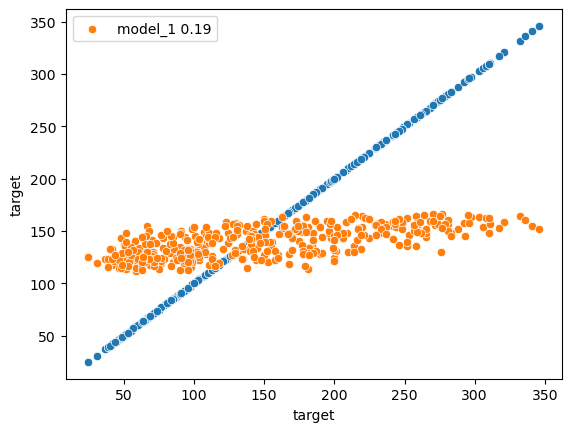

In [12]:
sns.scatterplot(y = y_train, x = y_train)
sns.scatterplot(y = model.predict(X_train), x = y_train, label =f'model_1 {round(model.score(X_train,y_train),2)}')

In [14]:
# Parameters for the SVM Model:
#   kernel='rbf'
#   degree = 3
#   gamma='scale'
#   coef0=0.0
#   tol=0.001
#   C=1.0


p_grid = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': np.arange(1,6),
    'C': np.logspace(-3,3,7)
}
grid = GridSearchCV(model, param_grid=p_grid, cv = 5)
grid

GridSearchCV(cv=5, estimator=SVR(C=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [15]:
grid.fit(X_train, y_train)

c:\Users\JoeDavis\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=SVR(C=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [16]:
grid.cv_results_

{'mean_fit_time': array([0.00836453, 0.00581717, 0.00484915, 0.00539966, 0.00480075,
        0.00401478, 0.0037991 , 0.00540113, 0.00540051, 0.00379825,
        0.00360861, 0.00543714, 0.00440087, 0.00339975, 0.00379429,
        0.0055994 , 0.00459218, 0.00359759, 0.00440707, 0.00522928,
        0.00504894, 0.00379906, 0.00359936, 0.00519848, 0.00439854,
        0.00359817, 0.00379844, 0.00499878, 0.00484862, 0.00339046,
        0.00422301, 0.00605092, 0.00460005, 0.00359945, 0.00439558,
        0.00621877, 0.00499964, 0.00379772, 0.00379753, 0.00582728,
        0.00547442, 0.00438695, 0.00420098, 0.00539932, 0.00459876,
        0.00340095, 0.00341606, 0.00544381, 0.00439425, 0.00339956,
        0.00442572, 0.00499783, 0.00483522, 0.00393229, 0.00441108,
        0.00599995, 0.00500193, 0.00380454, 0.00438919, 0.00599937,
        0.00480113, 0.00380087, 0.0054666 , 0.00763268, 0.00701647,
        0.00392394, 0.00484562, 0.00619802, 0.00559831, 0.0043993 ,
        0.00477834, 0.00619969,

In [19]:
pd.DataFrame(grid.cv_results_).iloc[:,4:]

,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001,1,rbf,"{'C': 0.001, 'degree': 1, 'kernel': 'rbf'}",-0.027389,-0.070671,-0.041472,-0.012958,-0.006938,-0.031886,0.022791,105
1,0.001,1,linear,"{'C': 0.001, 'degree': 1, 'kernel': 'linear'}",-0.027592,-0.070897,-0.041685,-0.013154,-0.007156,-0.032097,0.022797,116
2,0.001,1,poly,"{'C': 0.001, 'degree': 1, 'kernel': 'poly'}",-0.026437,-0.069955,-0.040654,-0.012324,-0.006169,-0.031108,0.022790,96
3,0.001,1,sigmoid,"{'C': 0.001, 'degree': 1, 'kernel': 'sigmoid'}",-0.026675,-0.070114,-0.040851,-0.012459,-0.006341,-0.031288,0.022791,99
4,0.001,2,rbf,"{'C': 0.001, 'degree': 2, 'kernel': 'rbf'}",-0.027389,-0.070671,-0.041472,-0.012958,-0.006938,-0.031886,0.022791,105
...,...,...,...,...,...,...,...,...,...,...,...,...
135,1000.000,4,sigmoid,"{'C': 1000.0, 'degree': 4, 'kernel': 'sigmoid'}",-3813.799130,-2906.176284,-4337.843633,-1508.767609,-5303.536770,-3574.024685,1291.776413,136
136,1000.000,5,rbf,"{'C': 1000.0, 'degree': 5, 'kernel': 'rbf'}",0.235484,0.396052,0.094717,0.084186,-0.182848,0.125518,0.191326,48
137,1000.000,5,linear,"{'C': 1000.0, 'degree': 5, 'kernel': 'linear'}",0.442095,0.555532,0.454792,0.396317,0.461554,0.462058,0.051983,7
138,1000.000,5,poly,"{'C': 1000.0, 'degree': 5, 'kernel': 'poly'}",-1.811348,-1.370190,-2.343710,-5.078436,-2.470641,-2.614865,1.292932,130


In [20]:
grid.best_estimator_

SVR(C=10.0, degree=1, kernel='sigmoid')

In [21]:
grid.best_score_

0.4766437477224745

<Axes: xlabel='target', ylabel='target'>

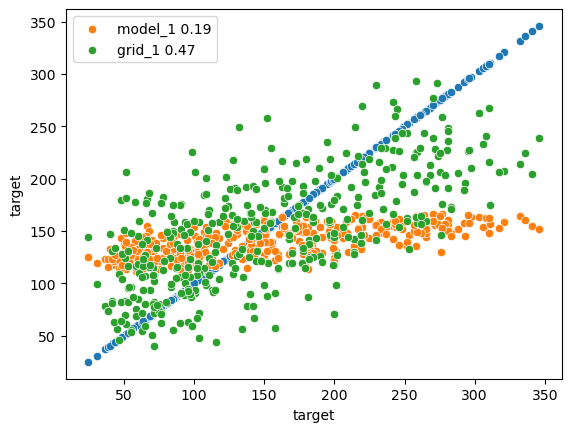

In [22]:
sns.scatterplot(y = y_train, x = y_train)
sns.scatterplot(y = model.predict(X_train), x = y_train, label =f'model_1 {round(model.score(X_train,y_train),2)}')
sns.scatterplot(y = grid.predict(X_train), x = y_train, label =f'grid_1 {round(grid.score(X_train,y_train),2)}')